In [705]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


The first dataset - NYC AIRBNB PRICE in 2019

Import and examine the data

In [706]:
airbnb = pd.read_csv("./AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Data Cleaning

In [707]:
#check the data types and number of non-null values
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There appears to be  null values so I need to identify them and replace them

In [708]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last_review, reviews_per_month col have the same number of null values most likely because tenants did not leave a review after staying in the airbnbs
name and host name have missing values but these are not likely to be used as features 

The last_review column tells us the data the airbnb was last reviewed which does not add a lot of insight to the analysis therefore this column can be dropped as well as the listing_id,host_name,name.
The name column is a description of the property but it is not standardised as it is at the owners discretion in what they write. Therefore this column will be dropped
The number of review per month is a better indicator of how popular a listing is therefore going to replace the null values with 0

In [709]:
airbnb['reviews_per_month'].replace(to_replace=np.nan, value=0, inplace=True)


In [710]:
airbnb.drop(['id','last_review','name'],inplace=True,axis =1)


In [711]:
print(airbnb.isnull().sum())
airbnb.head()

host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Have succesfully removed null values and dropped the columns that were not necessary too keep

Checking the value counts in the categoric columsn such as neighbourhood_group and room type
Should only be 5 boroughs and 3 room types

In [712]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [713]:
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Find Outliers and decide if they need to be removed or not!

Text(0.5, 1.0, 'reviews_per_month')

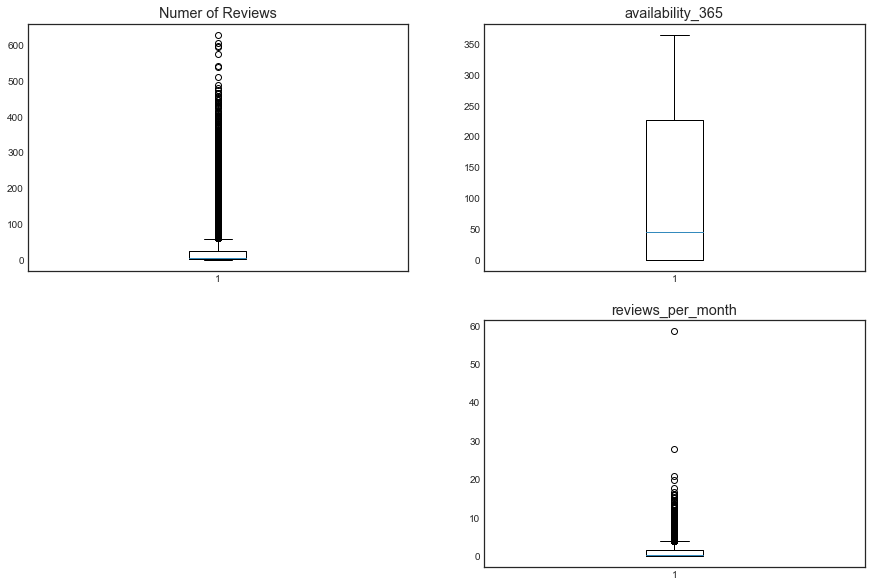

In [ ]:
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(airbnb['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(airbnb['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(223)
plt.boxplot(airbnb['reviews_per_month'])
ax.set_title('reviews_per_month')

The number of reviews,price and reviews per month features have a large amount of outliers which should be removed as the number is significant enough to affect the data analysis.
Outliers = 1.5 x IQR above the 3rd or below first quartile
Minimum,Q1,Meidian,Q3,Maximum

Use 5 number summary to determine outliers and remove them

In [715]:


Q1 = airbnb['number_of_reviews'].quantile(0.25)
Q3 = airbnb['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1 

filter = (airbnb['number_of_reviews'] >= Q1 - 1.5 * IQR) & (airbnb1['number_of_reviews'] <= Q3 + 1.5 *IQR)
airbnb1=airbnb.loc[filter]


Q1 = airbnb1['reviews_per_month'].quantile(0.25)
Q3 = airbnb1['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb1['reviews_per_month'] >= Q1 - 1.5 * IQR) & (airbnb2['reviews_per_month'] <= Q3 + 1.5 *IQR)
airbnb_new=airbnb1 .loc[filter]


Text(0.5, 1.0, 'reviews_per_month')

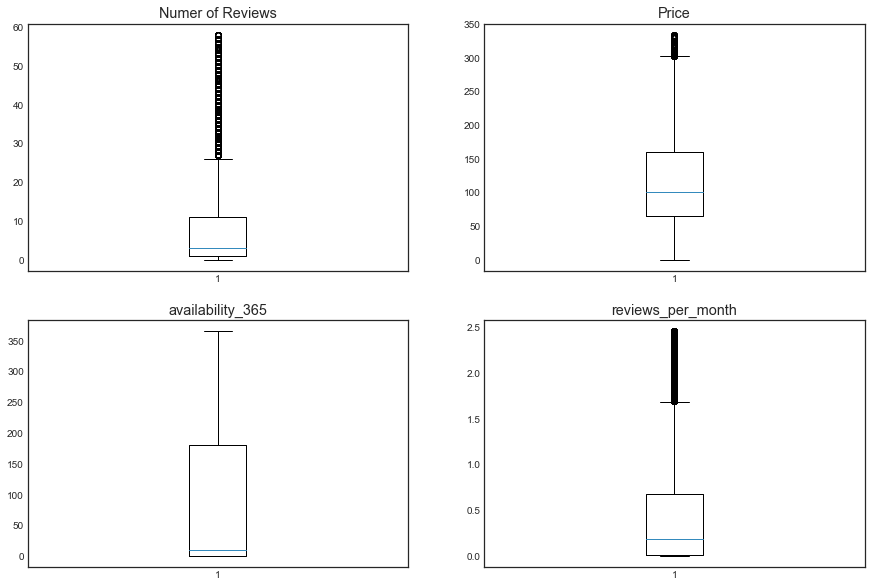

In [716]:
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(airbnb_new['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(airbnb_new['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(airbnb_new['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(airbnb_new['reviews_per_month'])
ax.set_title('reviews_per_month')

In [717]:
airbnb_new.drop('neighbourhood',axis=1,inplace=True)
airbnb_new.to_csv('airbnb_new.csv',index=False)

/var/folders/0n/_mlbrn4d5yx15c7r4016pgzh0000gn/T/ipykernel_13535/4037619354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_new.drop('neighbourhood',axis=1,inplace=True)


A lot of the outliers have been removed

Adding a col that categorises the price into 3 labels

In [757]:
#Classify the price of an airbnb into 3 categories: cheap, medium and expensive
airbnb['price_category'] = pd.cut(airbnb['price'], bins=[0, 100, 200, 1000], labels=['cheap', 'medium', 'expensive'])
print(airbnb['price_category'].value_counts())

cheap        23917
medium       16583
expensive     8145
Name: price_category, dtype: int64


Data Visualization

In [758]:
img = plt.imread('./nyc.png')

(-74.27099150000001, -73.6864185)
(40.4791265, 40.9337235)


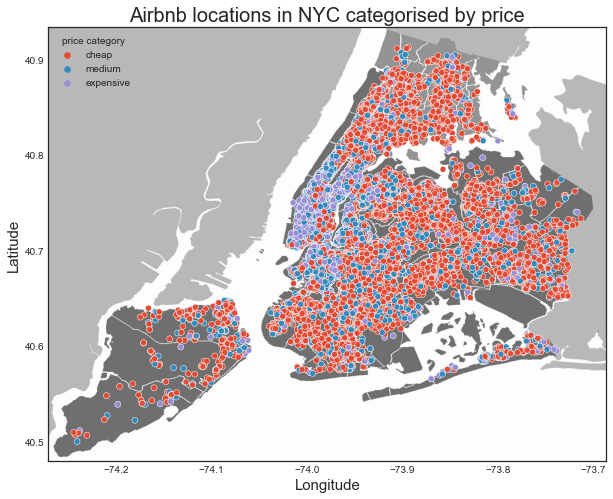

In [780]:
#plot the latitude and longitude for airbnbs by price category
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x='longitude', y='latitude', hue='price_category', data=airbnb,ax=ax)
#longitude is x,latitude is y
print(plt.xlim())
print(plt.ylim())

plt.xlim(-74.27099150000001, -73.6864185)
plt.ylim(40.4791265, 40.9337235)
plt.title('Airbnb locations in NYC categorised by price',fontsize=20)
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Latitude',fontsize=15)
plt.legend(loc='upper left',title = 'price category')
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])





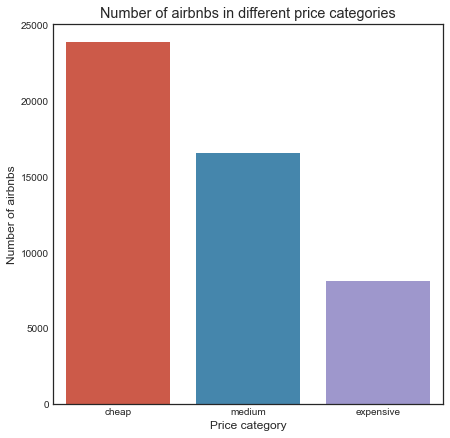

In [777]:
#plot the price categories
plt.figure(figsize = (7, 7))
plt.style.use('seaborn-white')
ax = sns.countplot(x = airbnb['price_category'])
ax.set_ylabel(ylabel = 'Number of airbnbs')
ax.set_xlabel(xlabel = 'Price category')
ax.set_title(label = 'Number of airbnbs in different price categories')
plt.show()

Subplot of the above 2 plots    

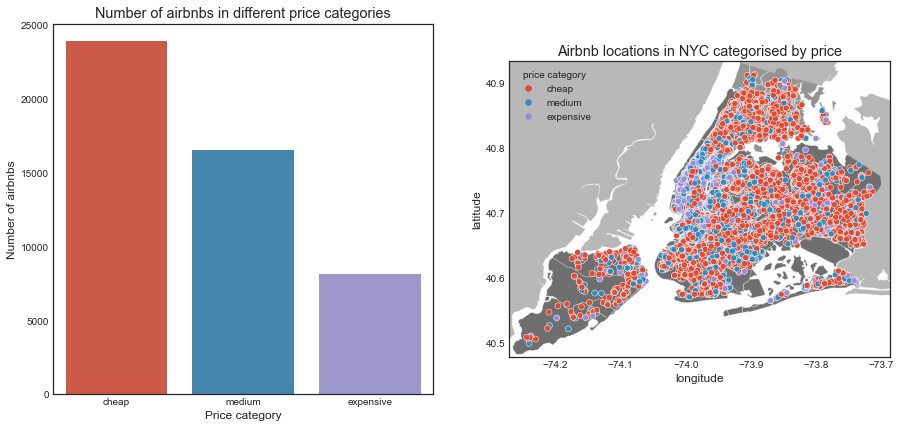

In [774]:
plt.figure(figsize = (15, 15))
ax = plt.subplot(221)
ax = sns.countplot(x = airbnb['price_category'])
ax.set_ylabel(ylabel = 'Number of airbnbs')
ax.set_xlabel(xlabel = 'Price category')
ax.set_title(label = 'Number of airbnbs in different price categories')

ax = plt.subplot(222)
sns.scatterplot(x='longitude', y='latitude', hue='price_category', data=airbnb,ax=ax)
plt.xlim(-74.27099150000001, -73.6864185)
plt.ylim(40.4791265, 40.9337235)
plt.title('Airbnb locations in NYC categorised by price')
plt.legend(loc='upper left',title = 'price category')
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])


Plot the correlation coefficients

In [784]:
airbnb.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,medium
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,expensive
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,medium
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,cheap
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,cheap


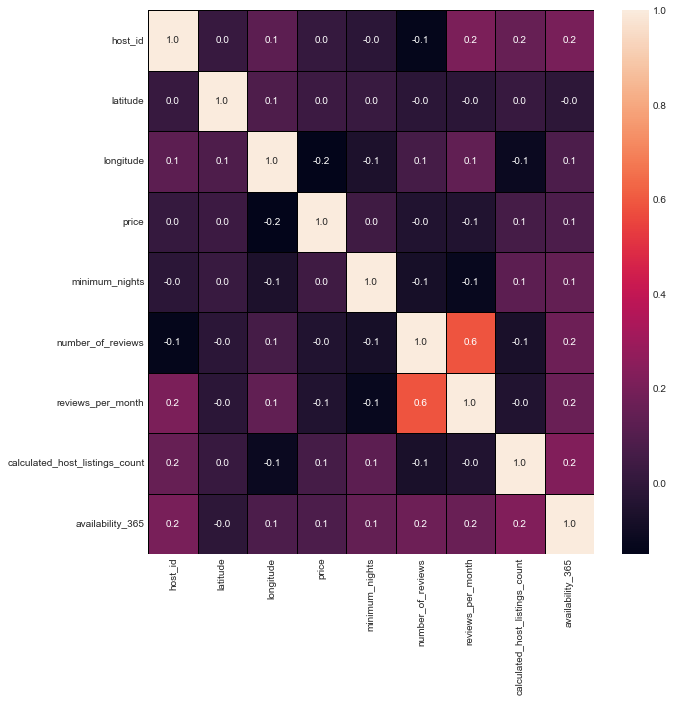

In [783]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(airbnb.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

Number of reviews and reviews per month have strong positive correlation and it is very obvious
Availability_365 and minimum nights have a small positive correlation(0.2) which shows that whenever the list was displayed people stayed there, which is also obvious
Price and Calculated list hosting have a small positive correlation(0.2) which shows that price has been increased when more number of lists have been shown to the host

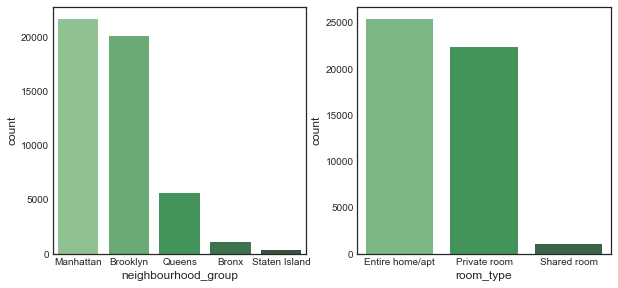

In [782]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
#Neighbourhood group
plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=airbnb, palette="Greens_d",
              order=airbnb.neighbourhood_group.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)

#Room type
plt.subplot(222)
sns.countplot(x="room_type", data=airbnb, palette="Greens_d",
              order=airbnb.room_type.value_counts().index)
fig = plt.gcf()
fig.set_size_inches(10,10)




In neighbourhood group(location),Manhattan and Brooklyn stands in the top 2 positions respectively owing to the size and number of people who booked a room and it is followed by Queens, Bronx and Staten Island
Most of the Entire home were booked than private and shared room type
host id 219517861 has the most number of books and he/she is the best customer of Airbnb in the NY

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

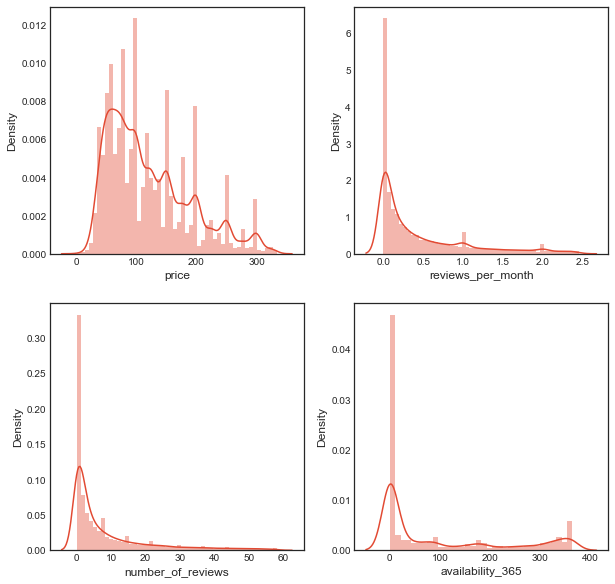

In [719]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.distplot(airbnb_new['price'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(222)
sns.distplot(airbnb_new['reviews_per_month'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(223)
sns.distplot(airbnb_new['number_of_reviews'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.subplot(224)
sns.distplot(airbnb_new['availability_365'])
fig = plt.gcf()
fig.set_size_inches(10,10)

All the numerical factors are having right skewed distribution
Price factor has an unstable distribution
Both the review factors distribution are similar as they are dependent

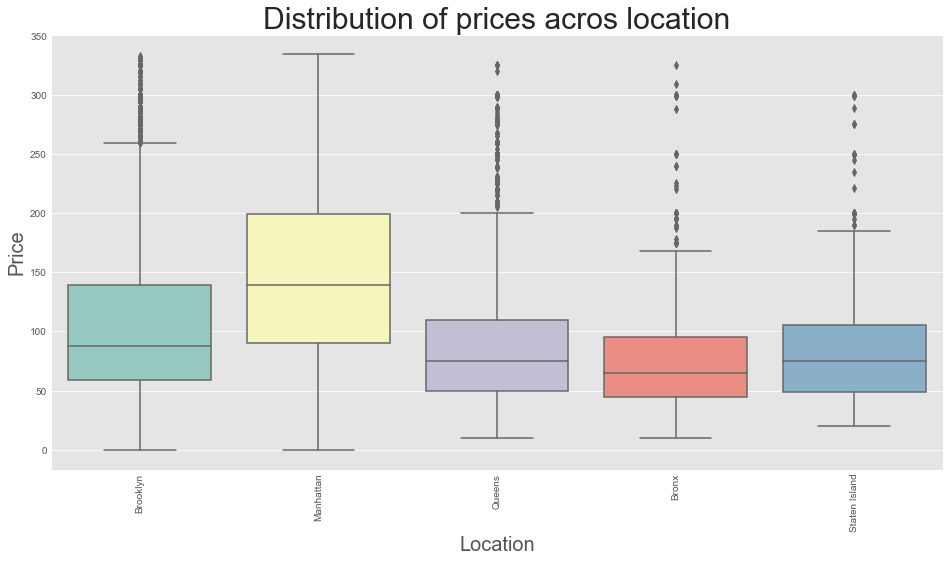

In [720]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = airbnb_new['neighbourhood_group'], y =airbnb_new['price'], data = airbnb_new, palette = 'Set3')
ax.set_xlabel(xlabel = 'Location', fontsize = 20)
ax.set_ylabel(ylabel = 'Price', fontsize = 20)
ax.set_title(label = 'Distribution of prices acros location', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


The average prices of Brooklyn,Queens and Statent Island is more are less the same which varies around 75-100 dollars
The prices are really high in Manhattan as the average price comes around 150 dollars and maximum reaches near 350 dollars
The prices in Bronx are comparatively low as it average price is around 60 dollars.

A final change is to split the neighbourhood so it has just the borough
Add this col to the final table

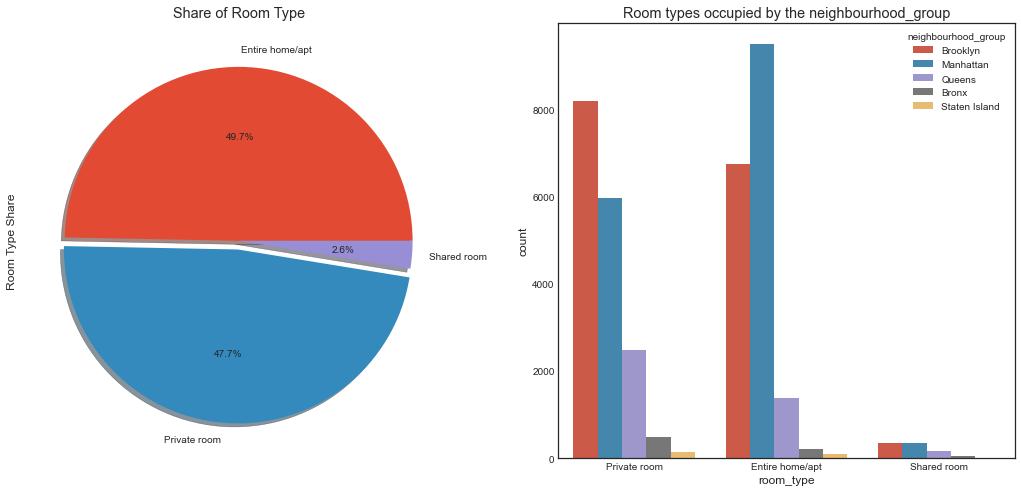

In [721]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
airbnb_new['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = airbnb_new)
ax[1].set_title('Room types occupied by the neighbourhood_group')
plt.show()

Very less(2.7%) people prefer shared room, may be people are not comfortable to stay with strangers in NY
More than 8000 people in Manhattan prefer Entire home/ apartment
Nearly around 8000 people in Brooklyn prefer private room
People in Staten island seldom book through airbnb

(-74.27099150000001, -73.6864185)
(40.4791265, 40.9337235)


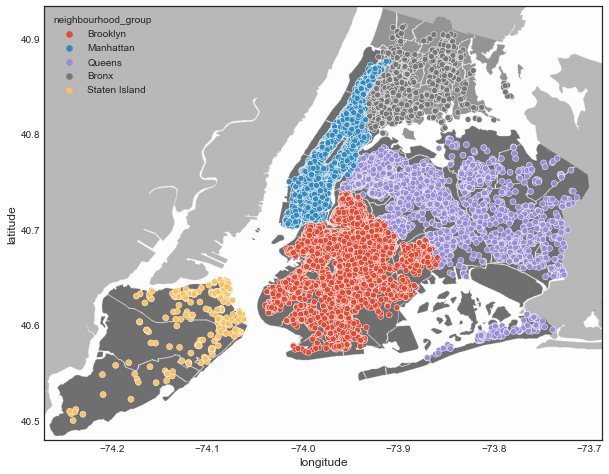

In [723]:
#plot a scatter plot of room type by longitude and latitude overlayed overlayed over the image of NYC

fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x="longitude", y="latitude", data=airbnb_new,hue="neighbourhood_group", ax=ax)
#longitude is x
#latitude is y
print(plt.xlim())
print(plt.ylim())

plt.xlim(-74.27099150000001, -73.6864185)
plt.ylim(40.4791265, 40.9337235)
# extent controls where the image starts and ends
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])

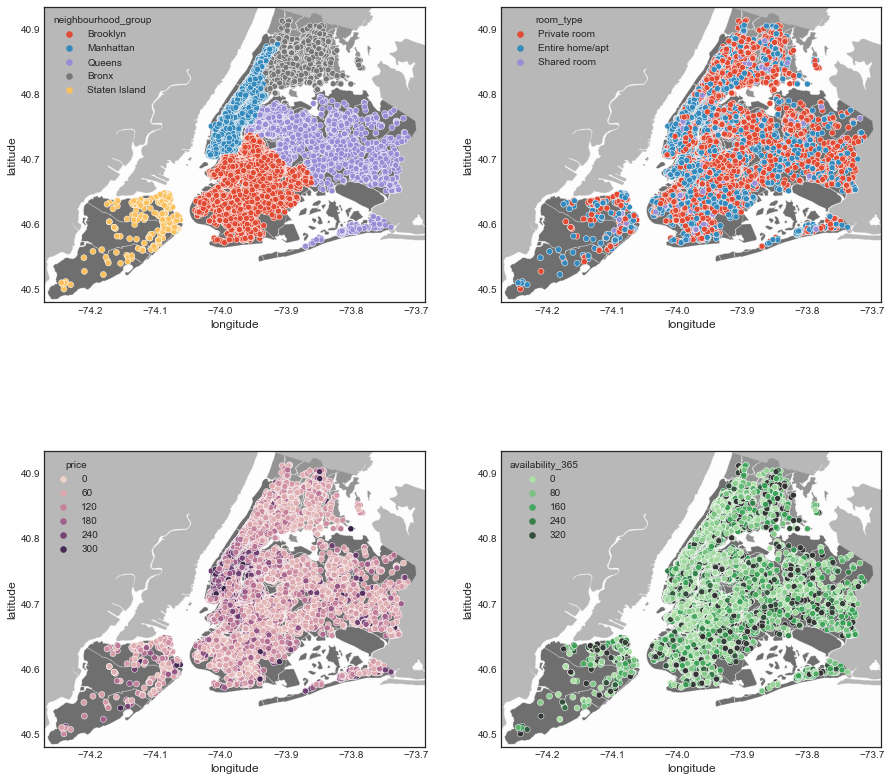

In [724]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
ax = plt.subplot(221)
sns.scatterplot(x="longitude", y="latitude",hue="neighbourhood_group", data=airbnb_new ,ax =ax)
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])
ax =plt.subplot(222)
sns.scatterplot(x="longitude", y="latitude",hue="room_type", data=airbnb_new,ax =ax)
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])
ax =plt.subplot(223)
sns.scatterplot(x="longitude", y="latitude",hue="price", data=airbnb_new,ax=ax)
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])
ax =plt.subplot(224)
sns.scatterplot(x="longitude", y="latitude",hue="availability_365", data=airbnb_new,ax=ax,palette="Greens_d")
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])



There are very less number of people who prefers shared room,and in Staten Island many prefers Entire home/apartment
The price range in Manhattan are pretty high whereas the prices in Staten Island are low even most of them prefer Entire home/ apartment
Brooklyn,Queens and Bronx are being listed many number of days for airbnb space in a year than rest of the location

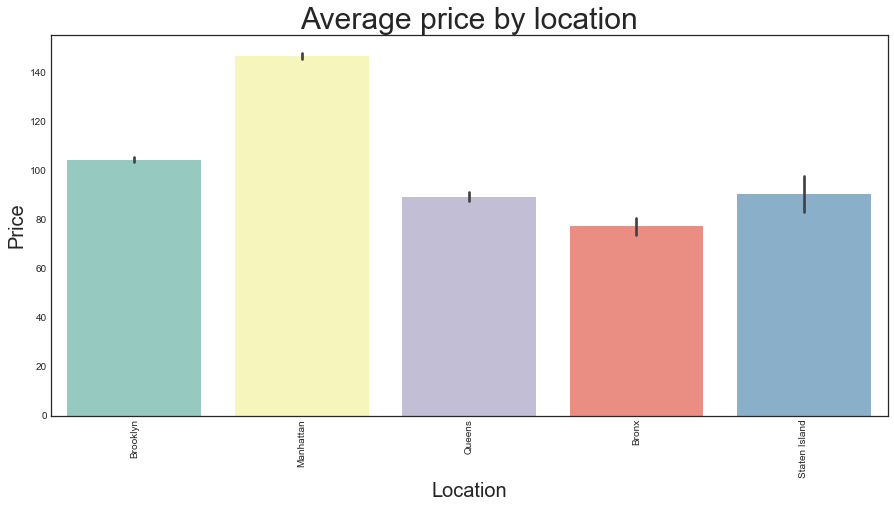

In [725]:
#plot average price by neighbourhood group
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.barplot(x = airbnb_new['neighbourhood_group'], y =airbnb_new['price'], data = airbnb_new, palette = 'Set3')
ax.set_xlabel(xlabel = 'Location', fontsize = 20)
ax.set_ylabel(ylabel = 'Price', fontsize = 20)
ax.set_title(label = 'Average price by location', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


Import the density dataset

In [726]:
density_src = "./nyc_borough_density.csv"
density = pd.read_csv(density_src)
density

,Borough,Population,Land_area,density
0,Bronx,1472654,109.3,13482
1,Brooklyn,2736074,179.7,15227
2,Manhattan,1694263,58.8,28872
3,Queens,2405464,281.5,8542
4,Staten Island,495747,148.9,3327


Plot of the price and date of the listing with a key of borough

Text(0, 0.5, 'Density - people per square km')

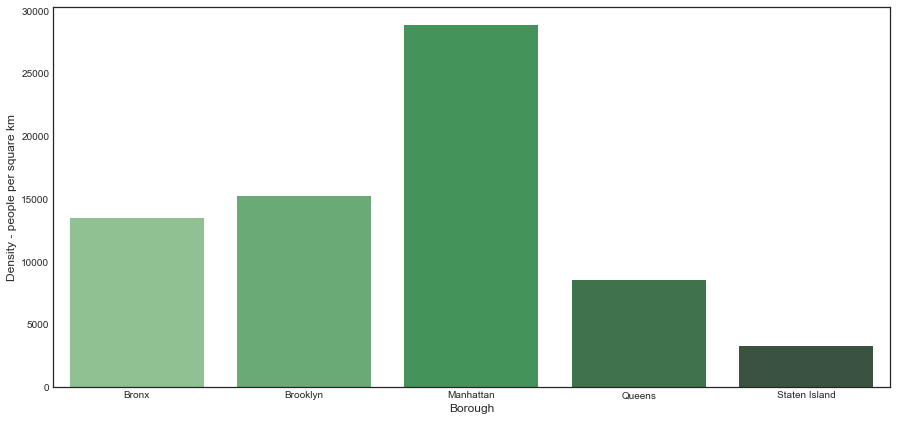

In [727]:
#plot the density of each borough
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
sns.barplot(x="Borough", y="density", data=density, palette="Greens_d")
#axis labels
plt.xlabel('Borough')
plt.ylabel('Density - people per square km')


Import the crime data and clean it up

In [728]:
crime_src = "./NYC_crime.csv"
#Y-m-d
crime = pd.read_csv(crime_src)
crime['arrest_date'] = pd.to_datetime(crime['arrest_date'],infer_datetime_format=True)
crime


,Unnamed: 0,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
4,4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881984,3881984,24592084,2006-10-01,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",GRAND LARCENY,PL 1553001,F,<18,M,BLACK,40.676655,-73.916466,K,73,0.0,69.0,2.0,17.0,52.0
3881985,3881985,24028282,2006-08-25,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,PL 2214000,M,<18,M,WHITE,40.625264,-73.998697,K,62,0.0,10.0,2.0,7.0,41.0
3881986,3881986,24036787,2006-08-26,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,M,18-24,M,BLACK,40.801304,-73.936106,M,25,0.0,7.0,4.0,35.0,16.0
3881987,3881987,24028407,2006-08-25,"TRAFFIC,UNCLASSIFIED MISDEMEANOR",VEHICLE AND TRAFFIC LAWS,VTL05110E2,F,25-44,M,BLACK,40.675505,-73.899692,K,75,0.0,45.0,2.0,37.0,47.0


In [729]:
borough_codes = {"M":"Manhattan","K":"Brooklyn","B":"Bronx","Q":"Queens","S":"Staten Island"}
crime['arrest_boro'] = crime['arrest_boro'].replace(borough_codes)
crime


,Unnamed: 0,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,Manhattan,25,0.0,7.0,4.0,36.0,16.0
1,1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,Manhattan,14,0.0,12.0,4.0,10.0,8.0
2,2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,Brooklyn,67,0.0,61.0,2.0,11.0,40.0
3,3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,Brooklyn,77,0.0,16.0,2.0,49.0,49.0
4,4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,Brooklyn,77,2.0,16.0,2.0,49.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881984,3881984,24592084,2006-10-01,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",GRAND LARCENY,PL 1553001,F,<18,M,BLACK,40.676655,-73.916466,Brooklyn,73,0.0,69.0,2.0,17.0,52.0
3881985,3881985,24028282,2006-08-25,"MARIJUANA, SALE 4 & 5",DANGEROUS DRUGS,PL 2214000,M,<18,M,WHITE,40.625264,-73.998697,Brooklyn,62,0.0,10.0,2.0,7.0,41.0
3881986,3881986,24036787,2006-08-26,"PUBLIC ADMINISTATION,UNCLASS MISDEMEAN 4",OFFENSES AGAINST PUBLIC ADMINISTRATION,PL 1950500,M,18-24,M,BLACK,40.801304,-73.936106,Manhattan,25,0.0,7.0,4.0,35.0,16.0
3881987,3881987,24028407,2006-08-25,"TRAFFIC,UNCLASSIFIED MISDEMEANOR",VEHICLE AND TRAFFIC LAWS,VTL05110E2,F,25-44,M,BLACK,40.675505,-73.899692,Brooklyn,75,0.0,45.0,2.0,37.0,47.0


In [730]:
crime.isnull().sum()

Unnamed: 0                         0
arrest_key                         0
arrest_date                        0
pd_desc                            0
ofns_desc                          0
law_code                           0
law_cat_cd                     13360
age_group                          0
perp_sex                           0
perp_race                          0
latitude                           0
longitude                          0
arrest_boro                        0
arrest_precinct                    0
jurisdiction_code                  0
:@computed_region_f5dn_yrer     5976
:@computed_region_yeji_bk3q     5980
:@computed_region_92fq_4b7q     5976
:@computed_region_sbqj_enih     5977
dtype: int64

Remove:

the law_cat_cd	Level of offense: felony, misdemeanor, violation
pd_desc	Description of internal classification corresponding with PD code (more granular than Offense Description) but more info than is needed for this analysis
law_code	NY penal law code of offense.
arrest_precinct	Police precinct that the arrest took place
jurisdiction_code	Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.
:@computed_region_f5dn_yrer	Community Districts
:@computed_region_yeji_bk3q	Borough Boundaries
:@computed_region_92fq_4b7q	City Council Districts
:@computed_region_sbqj_enih	Police Precincts

In [731]:
crime_new = crime.filter(['arrest_date','arrest_boro','latitude','longitude','ofns_desc'], axis=1)
crime_new.head()


,arrest_date,arrest_boro,latitude,longitude,ofns_desc
0,2019-01-26,Manhattan,40.800694,-73.941109,SEX CRIMES
1,2019-02-06,Manhattan,40.757839,-73.991212,CONTROLLED SUBSTANCES OFFENSES
2,2016-01-06,Brooklyn,40.648650,-73.950336,RAPE
3,2018-11-15,Brooklyn,40.674583,-73.930222,RAPE
4,2006-09-13,Brooklyn,40.671254,-73.926714,CRIMINAL TRESPASS


Look for outliers in terms of longitude and latitude

Text(0.5, 1.0, 'Longitude')

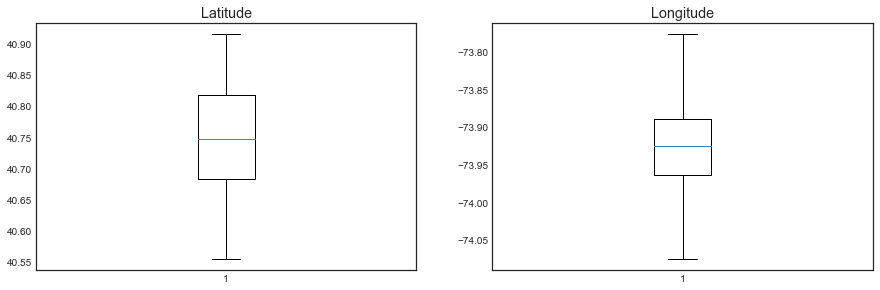

In [732]:
Q1 = crime_new['longitude'].quantile(0.25)
Q3 = crime_new['longitude'].quantile(0.75)
IQR = Q3 - Q1 
#Keep all prices 1.5 * IQR below and above the 1st and 3rd quartile respectively
filter = (crime_new['longitude'] >= Q1 - 1.5 * IQR) & (crime_new['longitude'] <= Q3 + 1.5 *IQR)
crime_new1=crime_new.loc[filter]

Q1 = crime_new1['latitude'].quantile(0.25)
Q3 = crime_new1['latitude'].quantile(0.75)
IQR = Q3 - Q1 

filter = (crime_new1['latitude'] >= Q1 - 1.5 * IQR) & (crime_new1['latitude'] <= Q3 + 1.5 *IQR)
crime_new2=crime_new1.loc[filter]




#plot a boxplot of latitude and longitude
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(crime_new2['latitude'])
ax.set_title('Latitude')
ax=plt.subplot(222)
plt.boxplot(crime_new2['longitude'],showfliers=False)
ax.set_title('Longitude')

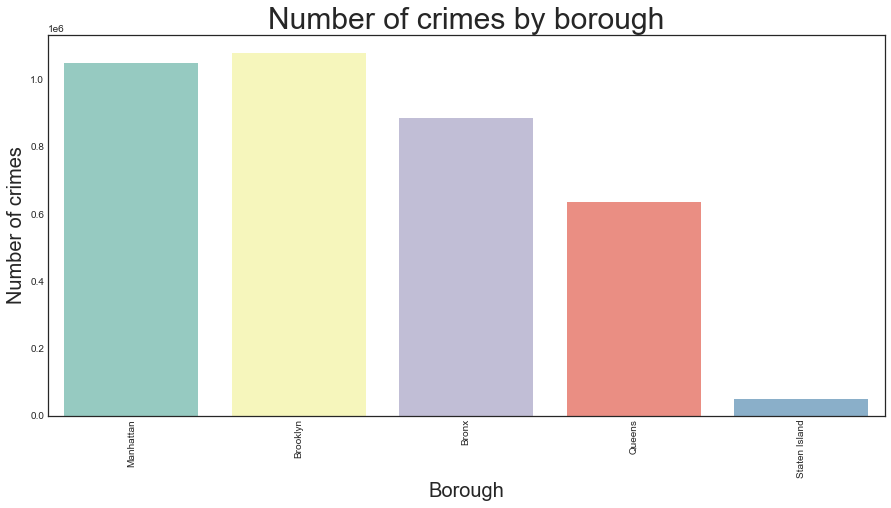

In [733]:
#plot the number of crimes by borough
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.countplot(x = crime_new2['arrest_boro'], data = crime_new2, palette = 'Set3')
ax.set_xlabel(xlabel = 'Borough', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of crimes', fontsize = 20)
ax.set_title(label = 'Number of crimes by borough', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


Normalize the data
Want data only for 2019

In [734]:
crime_2019 = crime_new2[crime_new2['arrest_date'].dt.year == 2019]
crime_2019

,arrest_date,arrest_boro,latitude,longitude,ofns_desc
0,2019-01-26,Manhattan,40.800694,-73.941109,SEX CRIMES
1,2019-02-06,Manhattan,40.757839,-73.991212,CONTROLLED SUBSTANCES OFFENSES
6,2019-04-23,Brooklyn,40.674583,-73.930222,RAPE
7,2019-05-04,Bronx,40.883383,-73.902333,SEX CRIMES
8,2019-05-23,Manhattan,40.814850,-73.956682,SEX CRIMES
...,...,...,...,...,...
162613,2019-11-13,Queens,40.742962,-73.955274,PETIT LARCENY
162614,2019-12-03,Staten Island,40.645023,-74.077217,MISCELLANEOUS PENAL LAW
162615,2019-11-11,Bronx,40.869407,-73.879998,FELONY ASSAULT
162616,2019-11-11,Brooklyn,40.689027,-73.986159,FELONY ASSAULT


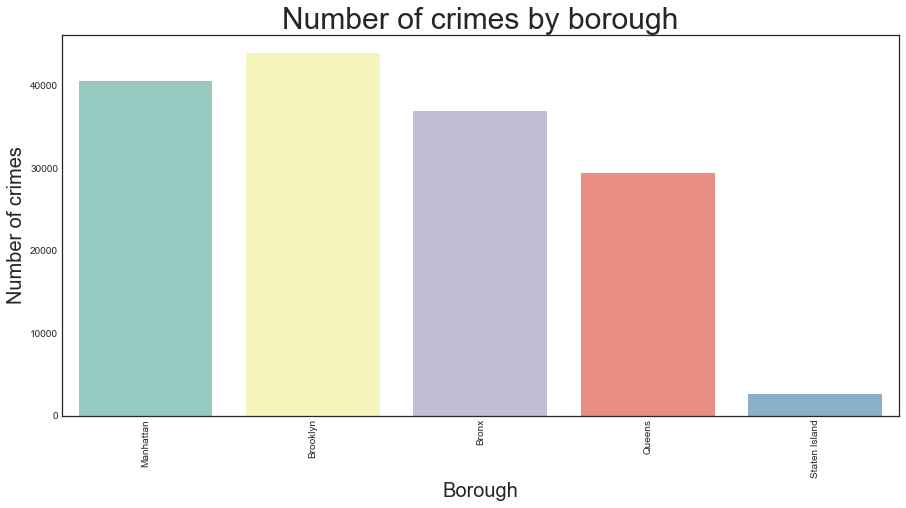

In [735]:
#plot the number of crimes by borough
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.countplot(x = crime_2019['arrest_boro'], data = crime_2019, palette = 'Set3')
ax.set_xlabel(xlabel = 'Borough', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of crimes', fontsize = 20)
ax.set_title(label = 'Number of crimes by borough', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

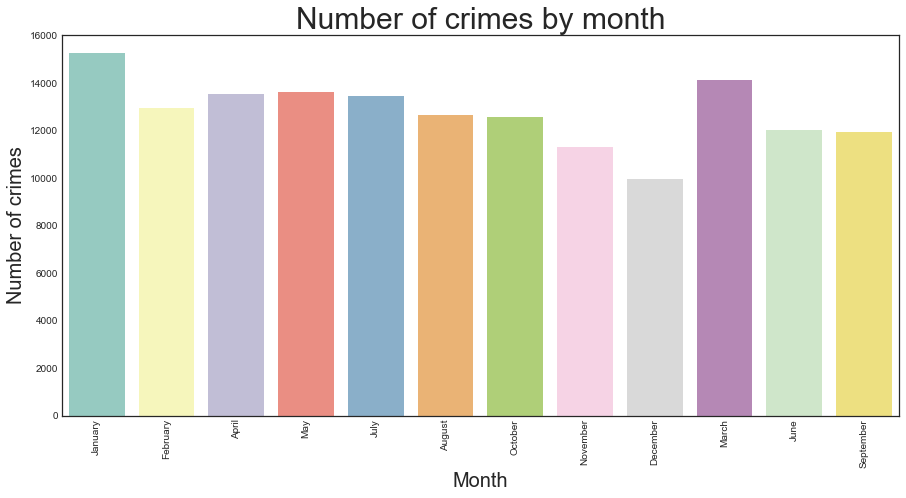

In [736]:
#plot crimes by month name
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.countplot(x = crime_2019['arrest_date'].dt.month_name(), data = crime_2019, palette = 'Set3')
ax.set_xlabel(xlabel = 'Month', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of crimes', fontsize = 20)
ax.set_title(label = 'Number of crimes by month', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


In [737]:
#group by month name and crime type

crime_2019_grouped =crime_2019.groupby([crime_2019['arrest_date'].dt.month_name(),'ofns_desc','arrest_boro']).size().reset_index(name='counts')
crime_2019_grouped


,arrest_date,ofns_desc,arrest_boro,counts
0,April,ADMINISTRATIVE CODE,Bronx,4
1,April,ADMINISTRATIVE CODE,Brooklyn,17
2,April,ADMINISTRATIVE CODE,Manhattan,1
3,April,ADMINISTRATIVE CODE,Queens,6
4,April,AGRICULTURE & MRKTS LAW-UNCLASSIFIED,Queens,1
...,...,...,...,...
2759,September,VEHICLE AND TRAFFIC LAWS,Bronx,127
2760,September,VEHICLE AND TRAFFIC LAWS,Brooklyn,131
2761,September,VEHICLE AND TRAFFIC LAWS,Manhattan,155
2762,September,VEHICLE AND TRAFFIC LAWS,Queens,143


In [738]:
# max crime type by month in
crime_2019_grouped_max = crime_2019_grouped.groupby(['arrest_date','arrest_boro'])['counts'].transform(max) == crime_2019_grouped['counts']
crime_2019_grouped_max = crime_2019_grouped[crime_2019_grouped_max]
crime_2019_grouped_max



,arrest_date,ofns_desc,arrest_boro,counts
13,April,ASSAULT 3 & RELATED OFFENSES,Bronx,594
14,April,ASSAULT 3 & RELATED OFFENSES,Brooklyn,511
16,April,ASSAULT 3 & RELATED OFFENSES,Queens,374
42,April,DANGEROUS DRUGS,Staten Island,36
176,April,PETIT LARCENY,Manhattan,543
244,August,ASSAULT 3 & RELATED OFFENSES,Bronx,592
245,August,ASSAULT 3 & RELATED OFFENSES,Brooklyn,512
247,August,ASSAULT 3 & RELATED OFFENSES,Queens,388
248,August,ASSAULT 3 & RELATED OFFENSES,Staten Island,33
401,August,PETIT LARCENY,Manhattan,524


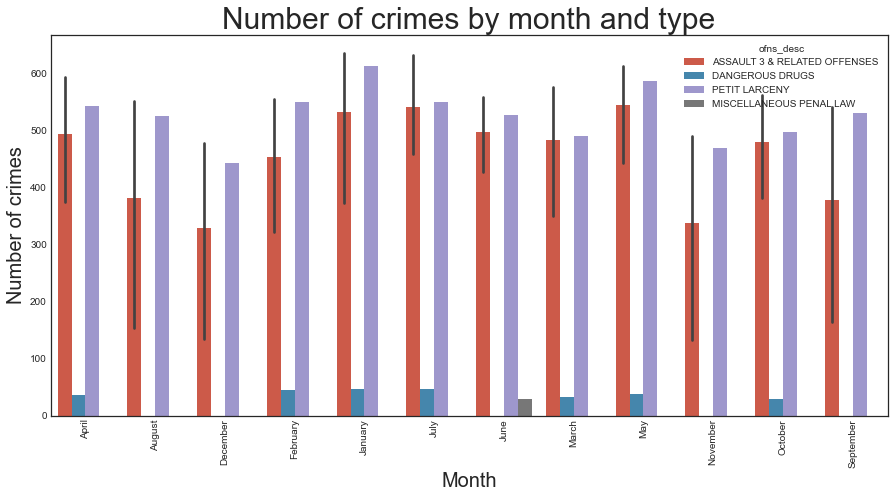

In [739]:
# plot the max crime type in each month
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.barplot(x = crime_2019_grouped_max['arrest_date'], y =crime_2019_grouped_max['counts'], data = crime_2019_grouped_max, hue = crime_2019_grouped_max['ofns_desc'])
ax.set_xlabel(xlabel = 'Month', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of crimes', fontsize = 20)
ax.set_title(label = 'Number of crimes by month and type', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()



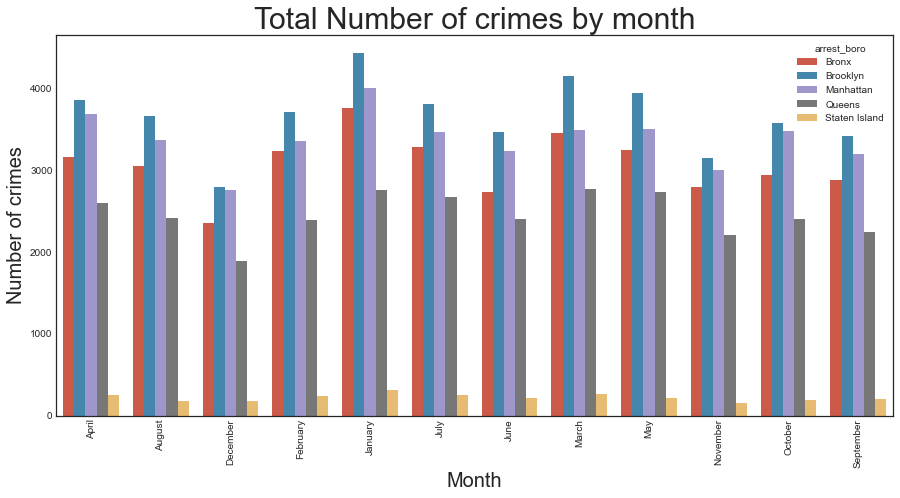

In [740]:
#total number of crimes by month in each borough
crime_2019_grouped_borough =crime_2019.groupby([crime_2019['arrest_date'].dt.month_name(),'arrest_boro']).size().reset_index(name='counts')
crime_2019_grouped_borough
#plot the total number of crimes by month in each borough
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.barplot(x = crime_2019_grouped_borough['arrest_date'], y =crime_2019_grouped_borough['counts'], data = crime_2019_grouped_borough, hue = crime_2019_grouped_borough['arrest_boro'])
ax.set_xlabel(xlabel = 'Month', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of crimes', fontsize = 20)
ax.set_title(label = 'Total Number of crimes by month', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()



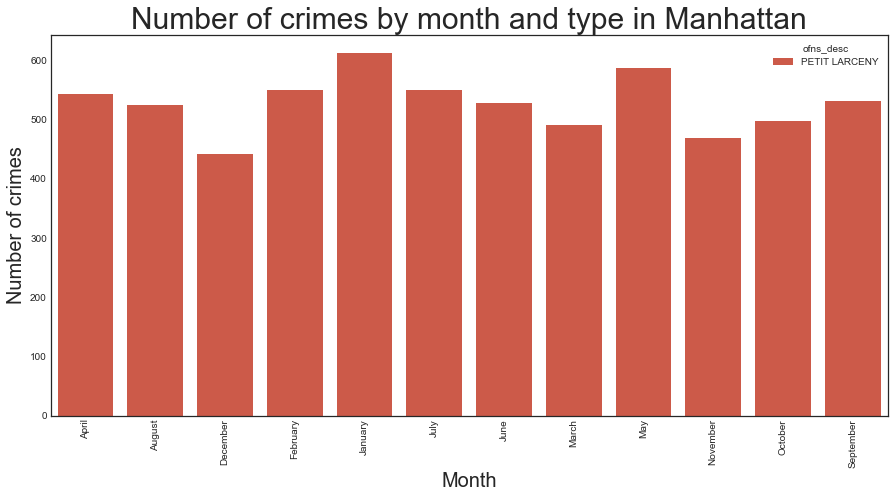

In [741]:
#plot the largest crime in each month for manhattan
crime_2019_grouped_manhattan = crime_2019_grouped_max[crime_2019_grouped_max['arrest_boro']=='Manhattan']
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.barplot(x = crime_2019_grouped_manhattan['arrest_date'], y =crime_2019_grouped_manhattan['counts'], data = crime_2019_grouped_manhattan, hue = crime_2019_grouped_manhattan['ofns_desc'])
ax.set_xlabel(xlabel = 'Month', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of crimes', fontsize = 20)
ax.set_title(label = 'Number of crimes by month and type in Manhattan', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


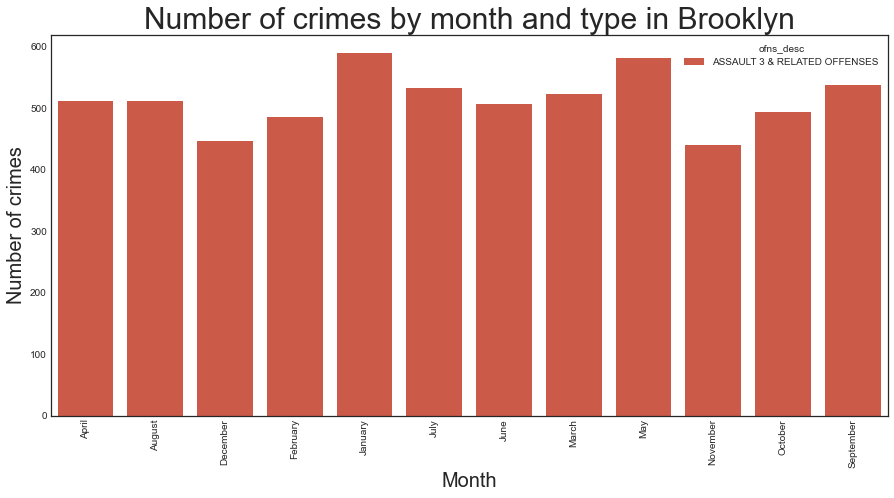

In [742]:
#plot the largest crime in each month for Brooklyn
crime_2019_grouped_brooklyn = crime_2019_grouped_max[crime_2019_grouped_max['arrest_boro']=='Brooklyn']
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.barplot(x = crime_2019_grouped_brooklyn['arrest_date'], y =crime_2019_grouped_brooklyn['counts'], data = crime_2019_grouped_brooklyn, hue = crime_2019_grouped_brooklyn['ofns_desc'])
ax.set_xlabel(xlabel = 'Month', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of crimes', fontsize = 20)
ax.set_title(label = 'Number of crimes by month and type in Brooklyn', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

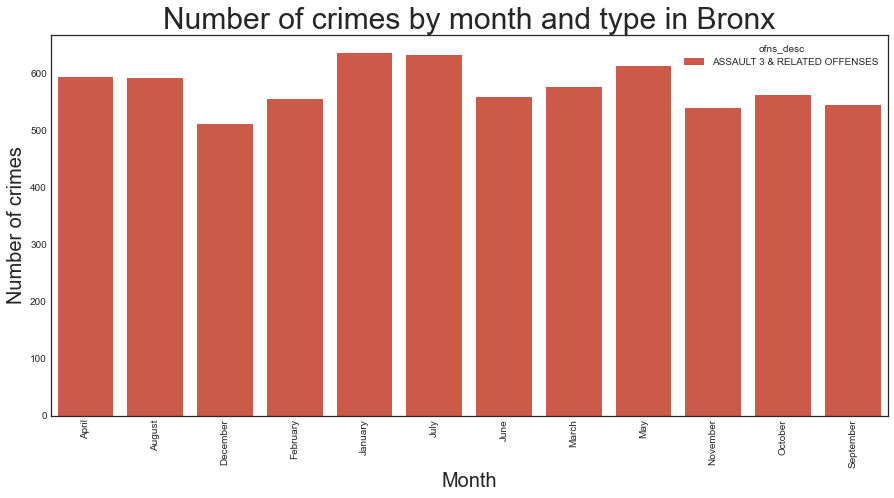

In [743]:
#plot the largest crime in each month for bronx
crime_2019_grouped_bronx = crime_2019_grouped_max[crime_2019_grouped_max['arrest_boro']=='Bronx']
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.barplot(x = crime_2019_grouped_bronx['arrest_date'], y =crime_2019_grouped_bronx['counts'], data = crime_2019_grouped_bronx, hue = crime_2019_grouped_bronx['ofns_desc'])
ax.set_xlabel(xlabel = 'Month', fontsize = 20)
ax.set_ylabel(ylabel = 'Number of crimes', fontsize = 20)
ax.set_title(label = 'Number of crimes by month and type in Bronx', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [744]:
#Crime with highest count in each month in manhattan
crime_2019_grouped_manhattan_max = crime_2019_grouped_manhattan.groupby(['arrest_date'])['counts'].transform(max) == crime_2019_grouped_manhattan['counts']
crime_2019_grouped_manhattan_max = crime_2019_grouped_manhattan

crime_2019_grouped_manhattan_max


,arrest_date,ofns_desc,arrest_boro,counts
176,April,PETIT LARCENY,Manhattan,543
401,August,PETIT LARCENY,Manhattan,524
625,December,PETIT LARCENY,Manhattan,442
851,February,PETIT LARCENY,Manhattan,549
1080,January,PETIT LARCENY,Manhattan,612
1315,July,PETIT LARCENY,Manhattan,549
1541,June,PETIT LARCENY,Manhattan,527
1776,March,PETIT LARCENY,Manhattan,490
2014,May,PETIT LARCENY,Manhattan,587
2241,November,PETIT LARCENY,Manhattan,469


In [745]:
#borough with highest crime in each month
crime_2019_grouped_borough_max = crime_2019_grouped.groupby(['arrest_date'])['counts'].transform(max) == crime_2019_grouped['counts']
crime_2019_grouped_borough_max = crime_2019_grouped[crime_2019_grouped_borough_max]
crime_2019_grouped_borough_max


,arrest_date,ofns_desc,arrest_boro,counts
13,April,ASSAULT 3 & RELATED OFFENSES,Bronx,594
244,August,ASSAULT 3 & RELATED OFFENSES,Bronx,592
470,December,ASSAULT 3 & RELATED OFFENSES,Bronx,510
685,February,ASSAULT 3 & RELATED OFFENSES,Bronx,555
916,January,ASSAULT 3 & RELATED OFFENSES,Bronx,635
1152,July,ASSAULT 3 & RELATED OFFENSES,Bronx,632
1382,June,ASSAULT 3 & RELATED OFFENSES,Bronx,559
1611,March,ASSAULT 3 & RELATED OFFENSES,Bronx,575
1849,May,ASSAULT 3 & RELATED OFFENSES,Bronx,612
2083,November,ASSAULT 3 & RELATED OFFENSES,Bronx,539


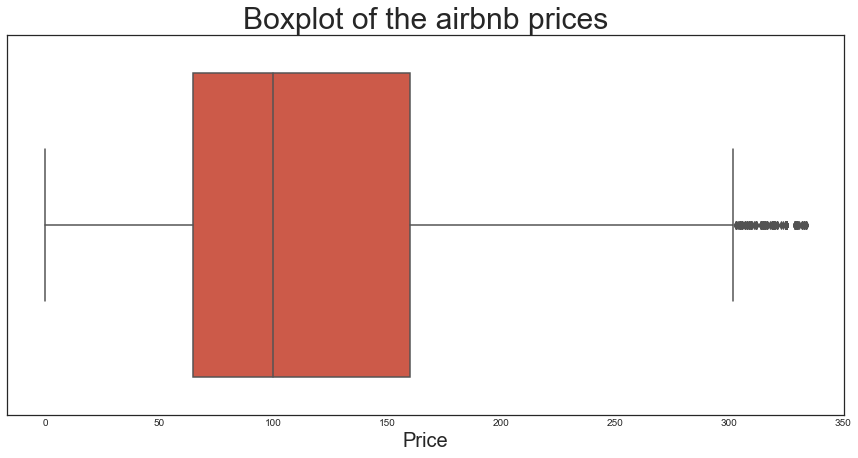

In [746]:
#plot a boxplot of the airbnb prices
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.boxplot(x = airbnb_new['price'])
ax.set_xlabel(xlabel = 'Price', fontsize = 20)
ax.set_title(label = 'Boxplot of the airbnb prices', fontsize = 30)
plt.show()


In [747]:
print(airbnb_new['price'].min())
print(airbnb_new['price'].max())
print(airbnb_new['price'].mean())
print(airbnb_new['price'].median())
print(airbnb_new['price'].std())


0
334
120.67232216994188
100.0
68.7729005885004


In [748]:
airbnb_new[airbnb_new.isnull().any(axis=1)]


,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
360,526653,NaN,Queens,40.72413,-73.76133,Private room,50,1,43,0.45,1,88
2700,7779204,NaN,Brooklyn,40.64965,-73.96154,Entire home/apt,100,30,49,0.69,1,342
5745,919218,NaN,Manhattan,40.80606,-73.95061,Private room,86,3,34,1.00,1,359
6075,23077718,NaN,Brooklyn,40.67512,-73.96146,Private room,50,1,0,0.00,1,0
6582,24576978,NaN,Brooklyn,40.72035,-73.95355,Entire home/apt,195,1,1,0.02,1,0
8257,33134899,NaN,Brooklyn,40.70146,-73.92792,Private room,37,1,1,0.02,1,0
9138,5162530,NaN,Brooklyn,40.71838,-73.95630,Entire home/apt,145,1,0,0.00,1,0
9817,39608626,NaN,Manhattan,40.82929,-73.94182,Private room,28,1,1,0.02,1,0
14040,7822683,NaN,Brooklyn,40.73539,-73.95838,Private room,55,10,2,0.05,1,0
14631,26138712,NaN,Queens,40.77587,-73.91775,Private room,45,1,5,0.13,1,0


In [749]:
#drop host_id,minimum_nights,calculated_host_listings_count,availability_365
airbnb_new2 = airbnb_new.drop(['host_id','minimum_nights','calculated_host_listings_count','availability_365'], axis = 1)

In [750]:
airbnb_new2[airbnb_new2.isnull().any(axis=1)]

,host_name,neighbourhood_group,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
360,NaN,Queens,40.72413,-73.76133,Private room,50,43,0.45
2700,NaN,Brooklyn,40.64965,-73.96154,Entire home/apt,100,49,0.69
5745,NaN,Manhattan,40.80606,-73.95061,Private room,86,34,1.00
6075,NaN,Brooklyn,40.67512,-73.96146,Private room,50,0,0.00
6582,NaN,Brooklyn,40.72035,-73.95355,Entire home/apt,195,1,0.02
8257,NaN,Brooklyn,40.70146,-73.92792,Private room,37,1,0.02
9138,NaN,Brooklyn,40.71838,-73.95630,Entire home/apt,145,0,0.00
9817,NaN,Manhattan,40.82929,-73.94182,Private room,28,1,0.02
14040,NaN,Brooklyn,40.73539,-73.95838,Private room,55,2,0.05
14631,NaN,Queens,40.77587,-73.91775,Private room,45,5,0.13


In [751]:
airbnb_new2.head()

,host_name,neighbourhood_group,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month
0,John,Brooklyn,40.64749,-73.97237,Private room,149,9,0.21
1,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,45,0.38
2,Elisabeth,Manhattan,40.80902,-73.94190,Private room,150,0,0.00
4,Laura,Manhattan,40.79851,-73.94399,Entire home/apt,80,9,0.10
6,Garon,Brooklyn,40.68688,-73.95596,Private room,60,49,0.40


cheap        18660
medium       13083
expensive     4380
Name: price_category, dtype: int64


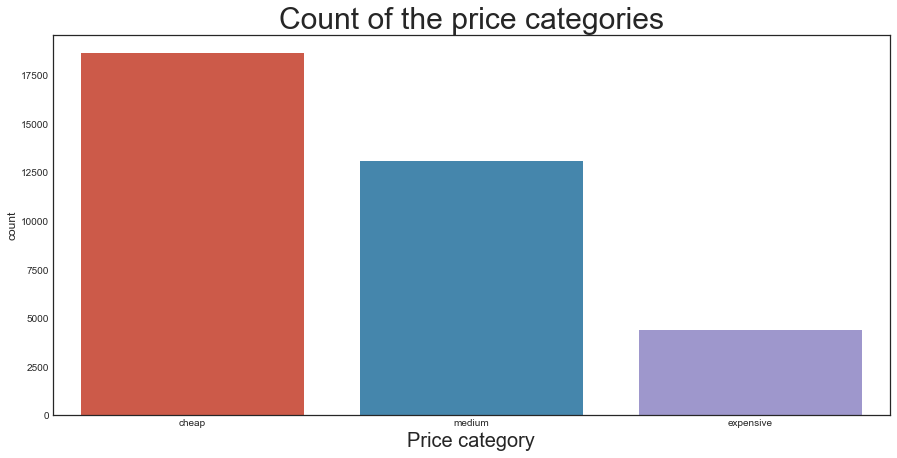

In [752]:
#Classify the price of an airbnb into 3 categories: cheap, medium and expensive
airbnb_new2['price_category'] = pd.cut(airbnb_new2['price'], bins=[0, 100, 200, 1000], labels=['cheap', 'medium', 'expensive'])
print(airbnb_new2['price_category'].value_counts())

#plot the price categories
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
ax = sns.countplot(x = airbnb_new2['price_category'])
ax.set_xlabel(xlabel = 'Price category', fontsize = 20)
ax.set_title(label = 'Number of airbnbs', fontsize = 30)
plt.show()


In [753]:
airbnb_new2[airbnb_new2.isnull().any(axis=1)]
#drop rows with missing values
airbnb_new2 = airbnb_new2.dropna()


In [754]:
#predict the price category of an airbnb depending on the neighbourhood, number of reviews, reviews per month, room type, longitude and latitude
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold


#split the data into training and testing data
X = airbnb_new2[['neighbourhood_group','number_of_reviews','reviews_per_month','room_type','longitude','latitude']]
y = airbnb_new2['price_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)




In [755]:
#fit the classification tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


[[2834  114  764]
 [ 119  317  432]
 [ 735  508 1399]]
              precision    recall  f1-score   support

       cheap       0.77      0.76      0.77      3712
   expensive       0.34      0.37      0.35       868
      medium       0.54      0.53      0.53      2642

    accuracy                           0.63      7222
   macro avg       0.55      0.55      0.55      7222
weighted avg       0.63      0.63      0.63      7222



In [756]:
Correlation coefficients of room types and price

SyntaxError: invalid syntax (3986350578.py, line 1)